In [78]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import time
from datetime import datetime,timedelta



In [79]:
lst = []
def scrap():
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    webpage = requests.get('https://etherscan.io/txs',headers=headers).text

    soup=BeautifulSoup(webpage,'lxml')
    a = soup.find_all('a',class_ ='d-inline-flex align-items-center')
    for i in a:
        lst.append(i['href'].split('/')[2])
        
def timer(a,nums):
    for i in range(nums):
        time.sleep(a)
        scrap()

In [80]:
timer(1,500)

In [81]:
print(len(lst))
b = set(lst)
print(len(b))

2641
308


In [216]:
c=[]
for i in b:
    if '0x' in i:
        c.append(i)
print(len(c))



308


In [83]:
import requests
import json
from requests import get
import matplotlib.pyplot as plt
from datetime import datetime


In [84]:
api_key  = 'DHW43XQBQ3A23E65GNQEB2Y74TMPYFQ81N'


In [85]:
def make_apiurl(module,action,address,**kwargs):
    url = "https://api.etherscan.io/api"+f"?module={module}&action={action}&address={address}&apikey={api_key}"
    for k,v in kwargs.items():
        url +=f'&{k}={v}'
    return url

In [218]:
balances = [] #prev - new
duration = [] #prev - new
ratio = []   # balances / duration
cumGasUsed = []
confirmations = []
tfReStat = []


for address in c:
    params = {
    "module":"account",
    "action":"balance",
    "address":address,
    "tag":"latest",
    "apikey":api_key
    }

    get_tran_url = make_apiurl("account","txlist",address,startblock=0,endblock=99999999,page=1,offset=10000,sort="asc")
    response = get(get_tran_url)
    data = response.json()['result']
    for tx in data:
       value = round((int(tx['value'])/10**16),2)
       balances.append(value)
       if "cumulativeGasUsed":
           cumGasUsed.append(int(tx["cumulativeGasUsed"]))
       
       if "confirmations":
           confirmations.append(int(tx["confirmations"]))
       if "txreceipt_status":
           if tx["txreceipt_status"]=='':
               tfReStat.append(0)
           else:
               tfReStat.append(int(tx["txreceipt_status"]))
       


In [222]:
print(len(balances))
print(len(cumGasUsed))
print(len(confirmations))
print(len(tfReStat))



431327
431327
431327
431327


In [219]:
import pandas as pd

In [224]:
final_bal = np.array(balances)
final_duration = np.array(duration)
final_ratio = np.array(ratio)
final_cum = np.array(cumGasUsed)
final_corm= np.array(confirmations)
final_tfReStat = np.array(tfReStat)

In [225]:
final_balx = []
minb = np.min(final_bal)
maxb = np.max(final_bal)
for i in final_bal:
    val = ((i-minb)/(maxb-minb))*100000
    final_balx.append(val)
x = np.percentile(final_balx, 80)
print(x)

4.816129032258064


In [278]:
np.percentile(final_balx,80)

4.816129032258064

In [ ]:
#6065123.0
#4.816129032258064

In [337]:
lst1 = []
for i in range(df.shape[0]):
    if i == 1:
        lst1.append(0)
    else:
        lst1.append(1)


In [338]:
final_lst1 = np.array(lst1)
final_last

In [339]:
np.unique(final_lst1)

array([0, 1])

In [397]:
# final_bal = np.array(balances)
# final_duration = np.array(duration)
# final_ratio = np.array(ratio)
# final_cum = np.array(cumGasUsed)
# final_corm= np.array(confirmations)
# final_tfReStat = np.array(tfReStat)
final_bal2 = []
maxele =final_bal.max()
for i in final_bal:
    if i == maxele:
        final_bal2.append(0)
    else:
        final_bal2.append(i)
final_bal2 = np.array(final_bal2)


In [399]:
print(final_bal2.mean())



46.27213568823653


In [407]:
lst1 = []
for i in range(len(final_bal2)-1):
    if (final_bal2[i+1]-final_bal2[i])>50:
        lst1.append(0)
    else:
        lst1.append(1)
lst1.append(1)
final_lst1 = np.array(lst1)
len(final_cum)
len(final_lst1)

431327

In [375]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

In [408]:

df = pd.DataFrame(np.transpose(np.vstack((final_bal2,final_cum,final_corm,final_tfReStat,final_lst1))), columns=['balance','gasUsed','confirmations','restat','output'])
df = df[df['balance'] != 0]
df['balance'] = rob_scaler.fit_transform(df['balance'].values.reshape(-1,1))
df['gasUsed'] = rob_scaler.fit_transform(df['gasUsed'].values.reshape(-1,1))
df['confirmations'] = rob_scaler.fit_transform(df['confirmations'].values.reshape(-1,1))
df['restat'] = rob_scaler.fit_transform(df['restat'].values.reshape(-1,1))
df['output'] = rob_scaler.fit_transform(df['output'].values.reshape(-1,1))



In [440]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('robust',RobustScaler()),
    ('classifier':RandomForestClassifier(bootstrap=True,max_depth=80,max_features=2,min_samples_leaf=3,min_samples_split=8,n_estimators=100))
])
def roSc(x):
    gasUsedme = df['gasUsed'].median()
    gasUsediqr = np.quantile(df['gasUsed'].values.reshape(-1,1),[0,0.25,0.5,0.75,1])
    return((x-gasUsedme)/(gasUsediqr[3]-gasUsediqr[1]))


In [441]:
roSc(6)

6.0

In [409]:
df.reset_index(inplace=True)


In [412]:
df.drop(columns=['balance'],inplace=True)

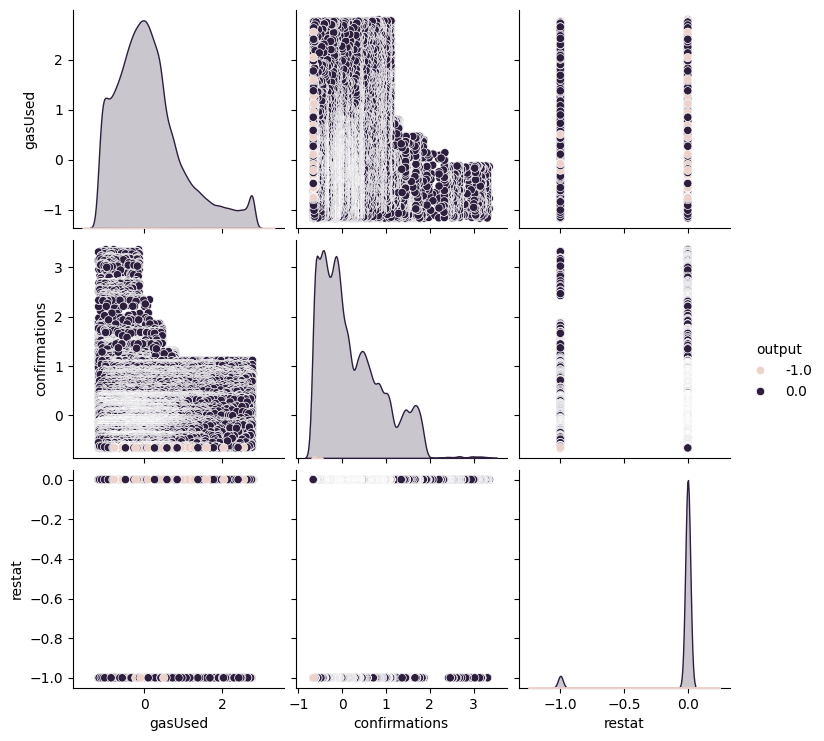

In [413]:
import seaborn as sns
sns.pairplot(df, hue = 'output')

In [173]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [414]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [415]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [416]:
X

,gasUsed,confirmations,restat
0,0.004265,-0.578270,0.0
1,0.311399,-0.584662,0.0
2,0.176382,-0.584719,0.0
3,0.809659,-0.584730,0.0
4,0.407643,-0.598777,0.0
...,...,...,...
214765,0.108229,-0.660321,0.0
214766,2.037649,-0.660726,0.0
214767,0.444355,-0.662008,0.0
214768,0.266368,-0.662045,0.0


In [417]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
214765   -1.0
214766   -1.0
214767   -1.0
214768    0.0
214769    0.0
Name: output, Length: 214770, dtype: float64

In [418]:
plt.scatter(df['balance'],df['gasUsed'])

KeyError: 'balance'

In [369]:
df[df['output']==1]

,balance,gasUsed,confirmations,output
233,24.79,19133794.0,1698918.0,1.0
361,109.00,8217784.0,1426391.0,1.0
536,3.09,6220154.0,992365.0,1.0
721,10.98,6105118.0,649779.0,1.0
1023,50.00,14726598.0,5216819.0,1.0
...,...,...,...,...
214610,20.81,9604545.0,132713.0,1.0
214617,100.00,7298622.0,131229.0,1.0
214634,100.00,8009977.0,124846.0,1.0
214660,60.00,8308852.0,119170.0,1.0


In [419]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [181]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, n_jobs=-1, cv=10, scoring='accuracy')
grid_result = grid_search.fit(X_train,y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 1.000000 using {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [421]:
clf = RandomForestClassifier(bootstrap=True,max_depth=80,max_features=2,min_samples_leaf=3,min_samples_split=8,n_estimators=100)

In [422]:
clf.fit(X,y)

RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=3,
                       min_samples_split=8)

In [423]:
y_pred = clf.predict(X_test)

In [424]:
from sklearn.metrics import r2_score
print("R2 score",r2_score(y_test,y_pred))


R2 score -0.000395928919114219


In [301]:


df[df['output'] == 0].shape

(44144, 5)

In [426]:
df

,gasUsed,confirmations,restat,output
0,0.004265,-0.578270,0.0,0.0
1,0.311399,-0.584662,0.0,0.0
2,0.176382,-0.584719,0.0,0.0
3,0.809659,-0.584730,0.0,0.0
4,0.407643,-0.598777,0.0,0.0
...,...,...,...,...
214765,0.108229,-0.660321,0.0,-1.0
214766,2.037649,-0.660726,0.0,-1.0
214767,0.444355,-0.662008,0.0,-1.0
214768,0.266368,-0.662045,0.0,0.0


In [428]:
def predict1(a,b,c):
    if clf.predict([[a,b,c]]) == 0:
        return 1
    else:
        return 0
clf.predict([[	0.108229,-0.660321,0.0]])

c:\Users\aksha\anaconda2\envs\aidev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [429]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))
